# Extraindo o dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

dataset = pd.read_csv("./dataset.csv")
print("Primeiras linhas do dataframe:")
print(dataset.head())



Primeiras linhas do dataframe:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again        

# Informações do dataset:

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
dataset.shape

(114000, 21)

# Filtrando dados relevantes

In [4]:
relevant_data = dataset[[
    "popularity", 
    "duration_ms", 
    "explicit", 
    "danceability", 
    "energy", 
    "key", 
    "loudness", 
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
    "track_genre"
]]
print(relevant_data)

        popularity  duration_ms  explicit  danceability  energy  key  \
0               73       230666     False         0.676  0.4610    1   
1               55       149610     False         0.420  0.1660    1   
2               57       210826     False         0.438  0.3590    0   
3               71       201933     False         0.266  0.0596    0   
4               82       198853     False         0.618  0.4430    2   
...            ...          ...       ...           ...     ...  ...   
113995          21       384999     False         0.172  0.2350    5   
113996          22       385000     False         0.174  0.1170    0   
113997          22       271466     False         0.629  0.3290    0   
113998          41       283893     False         0.587  0.5060    7   
113999          22       241826     False         0.526  0.4870    1   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0         -6.746     0       0.1430        0.0322     

# Mapeando os Gêneros de música.

In [5]:
genre = dataset[["track_genre", "track_id"]].groupby("track_genre").count().reset_index()
genre.to_csv("./genres.csv")
genre

,track_genre,track_id
0,acoustic,1000
1,afrobeat,1000
2,alt-rock,1000
3,alternative,1000
4,ambient,1000
...,...,...
109,techno,1000
110,trance,1000
111,trip-hop,1000
112,turkish,1000


# Avaliando distribuição da popularidade das Músicas

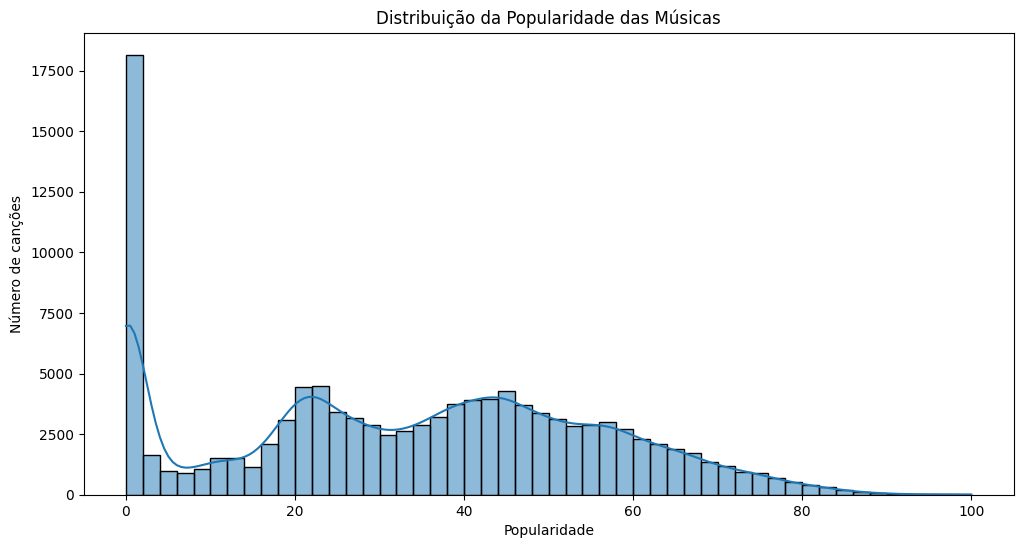

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(data=relevant_data, x="popularity", bins=50, kde=True)
plt.title("Distribuição da Popularidade das Músicas")
plt.xlabel("Popularidade")
plt.ylabel("Número de canções")
plt.show()

## Distribuição de Popularidade pelo Gênero da música

/tmp/ipykernel_17963/3708038823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=relevant_data, x='popularity', y='track_genre', palette='Set2')


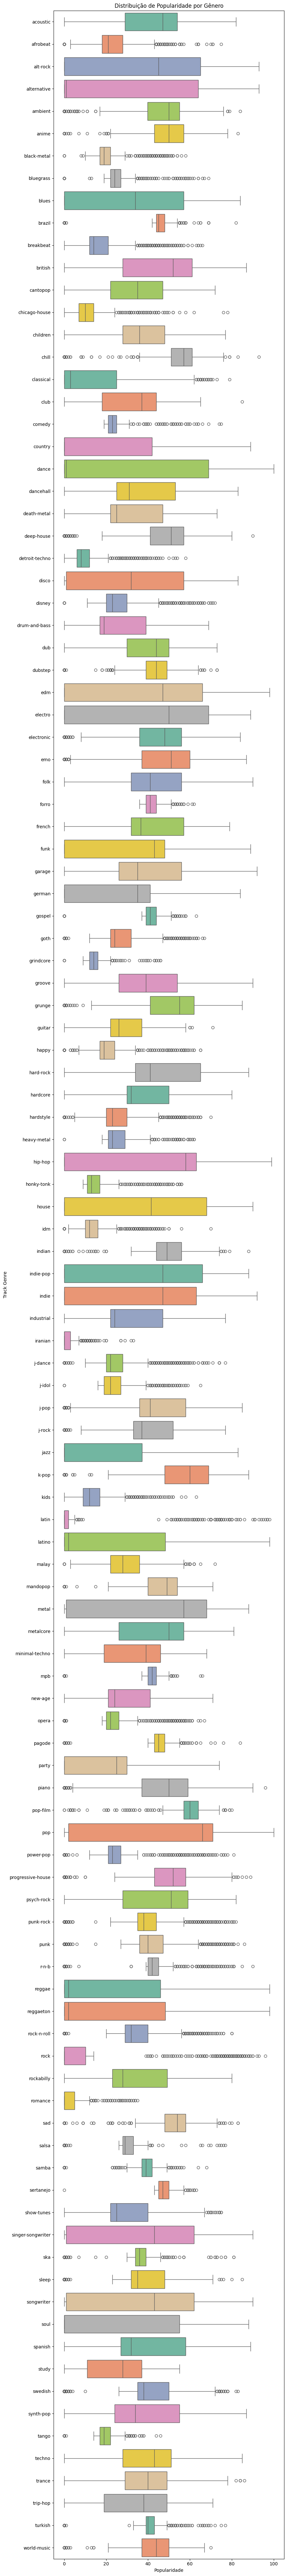

In [7]:
plt.figure(figsize=(9, 80))
sns.boxplot(data=relevant_data, x='popularity', y='track_genre', palette='Set2')
plt.title('Distribuição de Popularidade por Gênero')
plt.xlabel('Popularidade')
plt.ylabel('Track Genre')
plt.tight_layout()
plt.show()

# Correlação das variáveis Numéricas

* Popularidade
* Dançabilidade
* Altura (Volume)
* Acousticicidade
* Valência
* Duração em Milissegundos
* Energia
* Tom
* Chance de ter letra
* Indice Instrumental
* Andamento
* Compasso

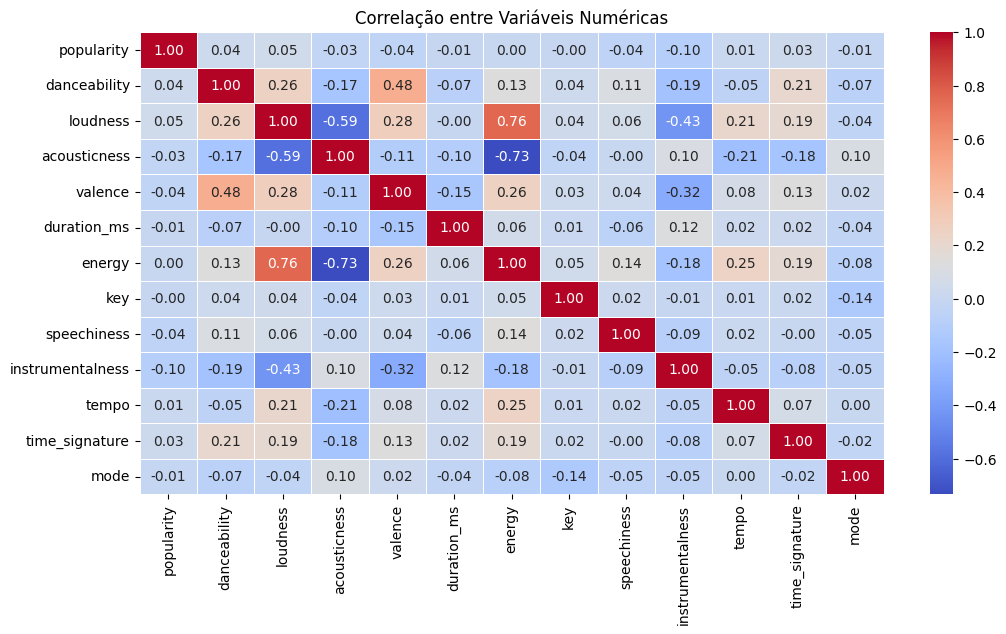

In [8]:
plt.figure(figsize=(12, 6))
# normalized = pd.get_dummies(data=relevant_data, dtype=float)
sns.heatmap(data=relevant_data[[
    "popularity", 
    "danceability", 
    "loudness", 
    "acousticness", 
    "valence",
    "duration_ms",
    "energy",
    "key",
    "speechiness",
    "instrumentalness",
    "tempo",
    "time_signature",
    "mode"
]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Variáveis Numéricas")
plt.show()

# Distribuição do Danceability por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='danceability', y='track_genre', palette='Set2')
plt.title('Distribuição do Danceability por gênero')
plt.xlabel('Danceability')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

# Distribuição do Loudness por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='loudness', y='track_genre', palette='Set2')
plt.title('Distribuição do Loudness por gênero')
plt.xlabel('Loudness')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

# Distribuição do Acousticness por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='acousticness', y='track_genre', palette='Set2')
plt.title('Distribuição do Acousticness por gênero')
plt.xlabel('Acousticness')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

# Distribuição do Valence por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='valence', y='track_genre', palette='Set2')
plt.title('Distribuição do Valence por gênero')
plt.xlabel('Valence')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

# Distribuição de Duração por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='duration_ms', y='track_genre', palette='Set2', showfliers=False)
plt.title('Distribuição do Duração por gênero')
plt.xlabel('Duração')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

# Distribuição do Energy por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='energy', y='track_genre', palette='Set2', showfliers=False)
plt.title('Distribuição do Energy por gênero')
plt.xlabel('Energy')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

# Distribuição do Key por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='key', y='track_genre', palette='Set2', showfliers=False)
plt.title('Distribuição do Key por gênero')
plt.xlabel('Key')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

# Distribuição do Speechiness por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='speechiness', y='track_genre', palette='Set2', showfliers=False)
plt.title('Distribuição do Speechiness por gênero')
plt.xlabel('Speechiness')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

# Distribuição do Instrumentalness por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='instrumentalness', y='track_genre', palette='Set2', showfliers=False)
plt.title('Distribuição do Instrumentalness por gênero')
plt.xlabel('Instrumentalness')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

# Distribuição do Tempo por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='tempo', y='track_genre', palette='Set2', showfliers=False)
plt.title('Distribuição do Tempo por gênero')
plt.xlabel('Tempo')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

# Distribuição do Time Signature por gênero

In [ ]:
plt.figure(figsize=(12, 80))
sns.boxplot(data=relevant_data, x='time_signature', y='track_genre', palette='Set2', showfliers=False)
plt.title('Distribuição do Time Signature por gênero')
plt.xlabel('Time Signature')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()